In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sys 
sys.path.append("..") 
from data_loader import get_database_path, get_h5_files, read_h5_file
from visualize import plot_event_cloud, plot_hists


In [2]:
database_path = get_database_path()
print("Database Path:", database_path)

bkg_files, sig_files = get_h5_files()
print("bkg_files:", bkg_files)
print("sig_files:", sig_files)

Database Path: D:\ADwithAE
bkg_files: [{'type': 'SM', 'file': 'background_for_training.h5'}]
sig_files: [{'type': 'A -> 4 leptons', 'file': 'Ato4l_lepFilter_13TeV_filtered.h5'}, {'type': 'LQ -> b tau', 'file': 'leptoquark_LOWMASS_lepFilter_13TeV_filtered.h5'}, {'type': 'h^0 -> tau tau', 'file': 'hToTauTau_13TeV_PU20_filtered.h5'}, {'type': 'h+ -> tau nu', 'file': 'hChToTauNu_13TeV_PU20_filtered.h5'}]


In [3]:
print("Background Files:")
for dataset in bkg_files:
    print(dataset['type'], dataset['file'])

print("Signal Files:")
for dataset in sig_files:
    print(dataset['type'], dataset['file'])

Background Files:
SM background_for_training.h5
Signal Files:
A -> 4 leptons Ato4l_lepFilter_13TeV_filtered.h5
LQ -> b tau leptoquark_LOWMASS_lepFilter_13TeV_filtered.h5
h^0 -> tau tau hToTauTau_13TeV_PU20_filtered.h5
h+ -> tau nu hChToTauNu_13TeV_PU20_filtered.h5


In [4]:
bkg = read_h5_file(database_path, bkg_files[0]['file'])['Particles']
# SM processes

neutral_boson = read_h5_file(database_path, sig_files[0]['file'])['Particles']
# A neutral scalar boson (A) with mass 50 GeV, decaying to two off-shell Z bosons, each forced to decay to two leptons: A → 4l

leptoquark = read_h5_file(database_path, sig_files[1]['file'])['Particles']
# A leptoquark (LQ) with mass 80 GeV, decaying to a b quark and a τ lepton24

neutral_higgs = read_h5_file(database_path, sig_files[2]['file'])['Particles']
# A scalar boson with mass 60 GeV, decaying to two tau leptons: h0→ ττ

charged_higgs = read_h5_file(database_path, sig_files[3]['file'])['Particles']
# A charged scalar boson with mass 60 GeV, decaying to a tau lepton and a neutrino



print(bkg.shape)
print(neutral_boson.shape)
print(leptoquark.shape)
print(neutral_higgs.shape)
print(charged_higgs.shape)

(13451915, 19, 4)
(55969, 19, 4)
(340544, 19, 4)
(691283, 19, 4)
(760272, 19, 4)


Event 9148448
[[ 6.84516764  0.         -1.61231875  1.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [48.5210495   1.48035359  2.97253346  3.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [23.76585197 -1.45214224 -0.83779562  4.        ]
 [17.50242996  0.27086625  0.04983194  4.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


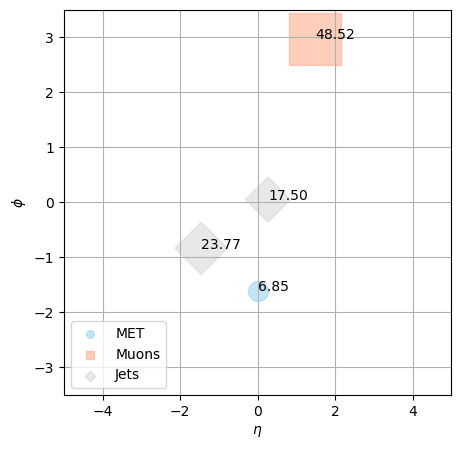

In [7]:
n = np.random.randint(bkg.shape[0])
print("Event", n)
test_event = bkg[n]
print(test_event)
plot_event_cloud(test_event)

Event 47897
[[ 2.12935200e+01  0.00000000e+00 -2.69043159e+00  1.00000000e+00]
 [ 7.34823990e+01  4.05448712e-02  8.47969890e-01  2.00000000e+00]
 [ 8.90751934e+00  1.01499808e+00  8.65766466e-01  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.52622852e+01 -9.88142118e-02  1.35626686e+00  3.00000000e+00]
 [ 1.06835165e+01 -1.98302329e-01  1.84176013e-01  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.81613846e+01  1.98264313e+00 -1.94129074e+00  4.00000000e+00]
 [ 7.48263855e+01  4.70554829e-02  8.50590527e-01  4.00000000e+00]
 [ 4.12432747e+01 -1.54735103e-01 -3.03520393e+00  4.00000000e+00]
 [ 2.52622852e+01 -9.88142118e-02  1.35626686e+00  4.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 

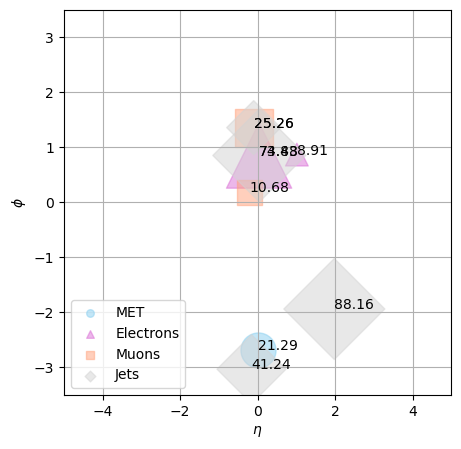

In [6]:
n = np.random.randint(neutral_boson.shape[0])
print("Event", n)
test_event = neutral_boson[n]
print(test_event)
plot_event_cloud(test_event)

In [8]:
bkg  = np.array(bkg)
pT_MET = bkg[:,0,0]
eta_MET = bkg[:,0,1]
phi_MET = bkg[:,0,2]

print("Max of p_T_MET:", max(pT_MET))
print("Max of eta_MET:", max(eta_MET))
print("Max of phi_MET:", max(phi_MET))

print("Min of p_T_MET:", min(pT_MET))
print("Min of eta_MET:", min(eta_MET))
print("Min of phi_MET:", min(phi_MET))



p_T_electrons = bkg[:,1:5,0]
eta_electrons = bkg[:,1:5,1]
phi_electrons = bkg[:,1:5,2]

print("Max of p_T_electrons:", max(p_T_electrons.flatten()))
print("Max of eta_electrons:", max(eta_electrons.flatten()))
print("Max of phi_electrons:", max(phi_electrons.flatten()))

print("Min of p_T_electrons:", min(p_T_electrons.flatten()))
print("Min of eta_electrons:", min(eta_electrons.flatten()))
print("Min of phi_electrons:", min(phi_electrons.flatten()))



p_T_muons = bkg[:,5:7,0]
eta_muons = bkg[:,5:7,1]
phi_muons = bkg[:,5:7,2]

print("Max of p_T_muons:", max(p_T_muons.flatten()))
print("Max of eta_muons:", max(eta_muons.flatten()))
print("Max of phi_muons:", max(phi_muons.flatten()))

print("Min of p_T_muons:", min(p_T_muons.flatten()))
print("Min of eta_muons:", min(eta_muons.flatten()))
print("Min of phi_muons:", min(phi_muons.flatten()))



p_T_jets = bkg[:,7:,0]
eta_jets = bkg[:,7:,1]
phi_jets = bkg[:,7:,2]

print("Max of p_T_jets:", max(p_T_jets.flatten()))
print("Max of eta_jets:", max(eta_jets.flatten()))
print("Max of phi_jets:", max(phi_jets.flatten()))

print("Min of p_T_jets:", min(p_T_jets.flatten()))
print("Min of eta_jets:", min(eta_jets.flatten()))
print("Min of phi_jets:", min(phi_jets.flatten()))

Max of p_T_MET: 7039.09521484375
Max of eta_MET: 0.0
Max of phi_MET: 3.141591787338257
Min of p_T_MET: 0.010911921970546246
Min of eta_MET: 0.0
Min of phi_MET: -3.1415903568267822
Max of p_T_electrons: 1167.7591552734375
Max of eta_electrons: 2.9999992847442627
Max of phi_electrons: 3.141592502593994
Min of p_T_electrons: 0.0
Min of eta_electrons: -2.9999988079071045
Min of phi_electrons: -3.1415913105010986
Max of p_T_muons: 1229.38525390625
Max of eta_muons: 2.0999999046325684
Max of phi_muons: 3.141592502593994
Min of p_T_muons: 0.0
Min of eta_muons: -2.0999996662139893
Min of phi_muons: -3.141587495803833
Max of p_T_jets: 2026.547119140625
Max of eta_jets: 3.9999947547912598
Max of phi_jets: 3.141592025756836
Min of p_T_jets: 0.0
Min of eta_jets: -3.9999990463256836
Min of phi_jets: -3.141591787338257


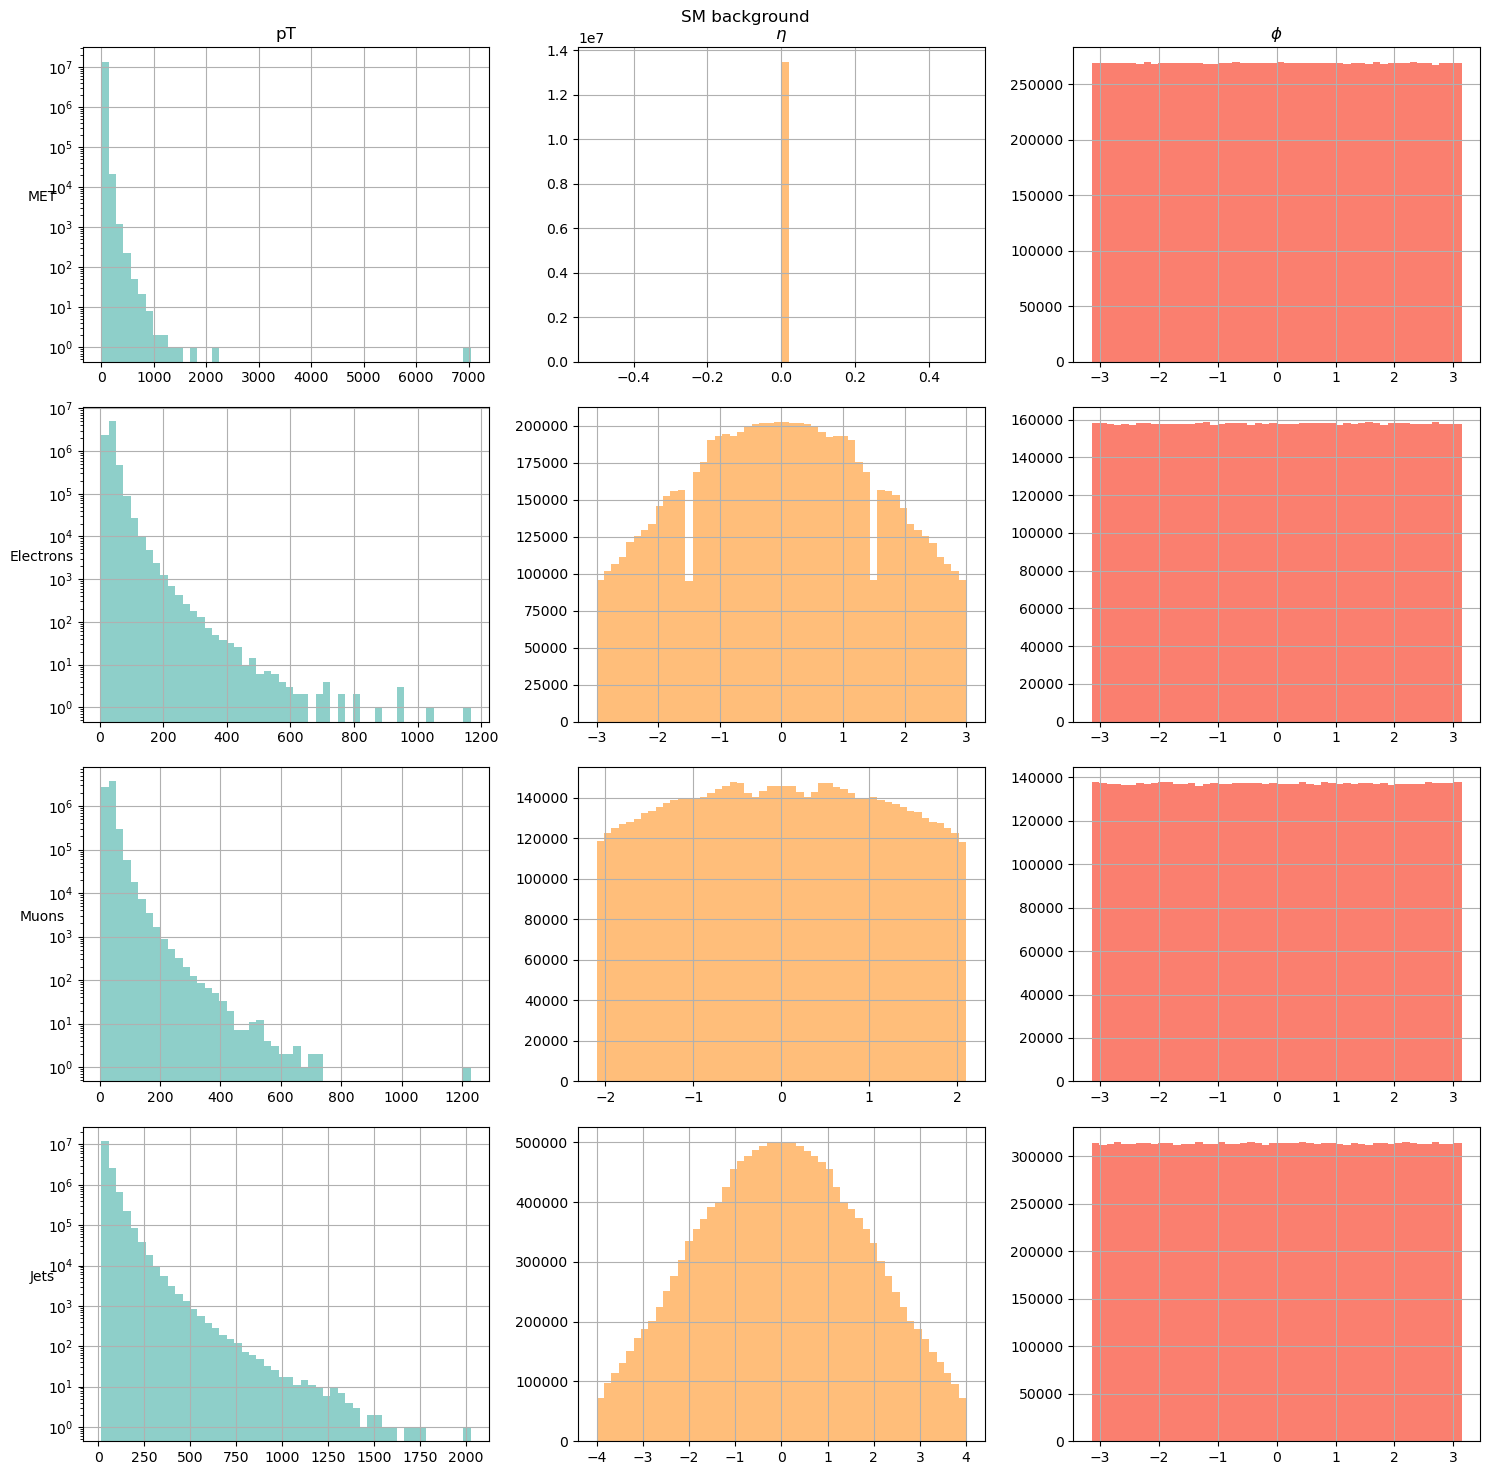

In [7]:
plot_hists(bkg, "SM background")

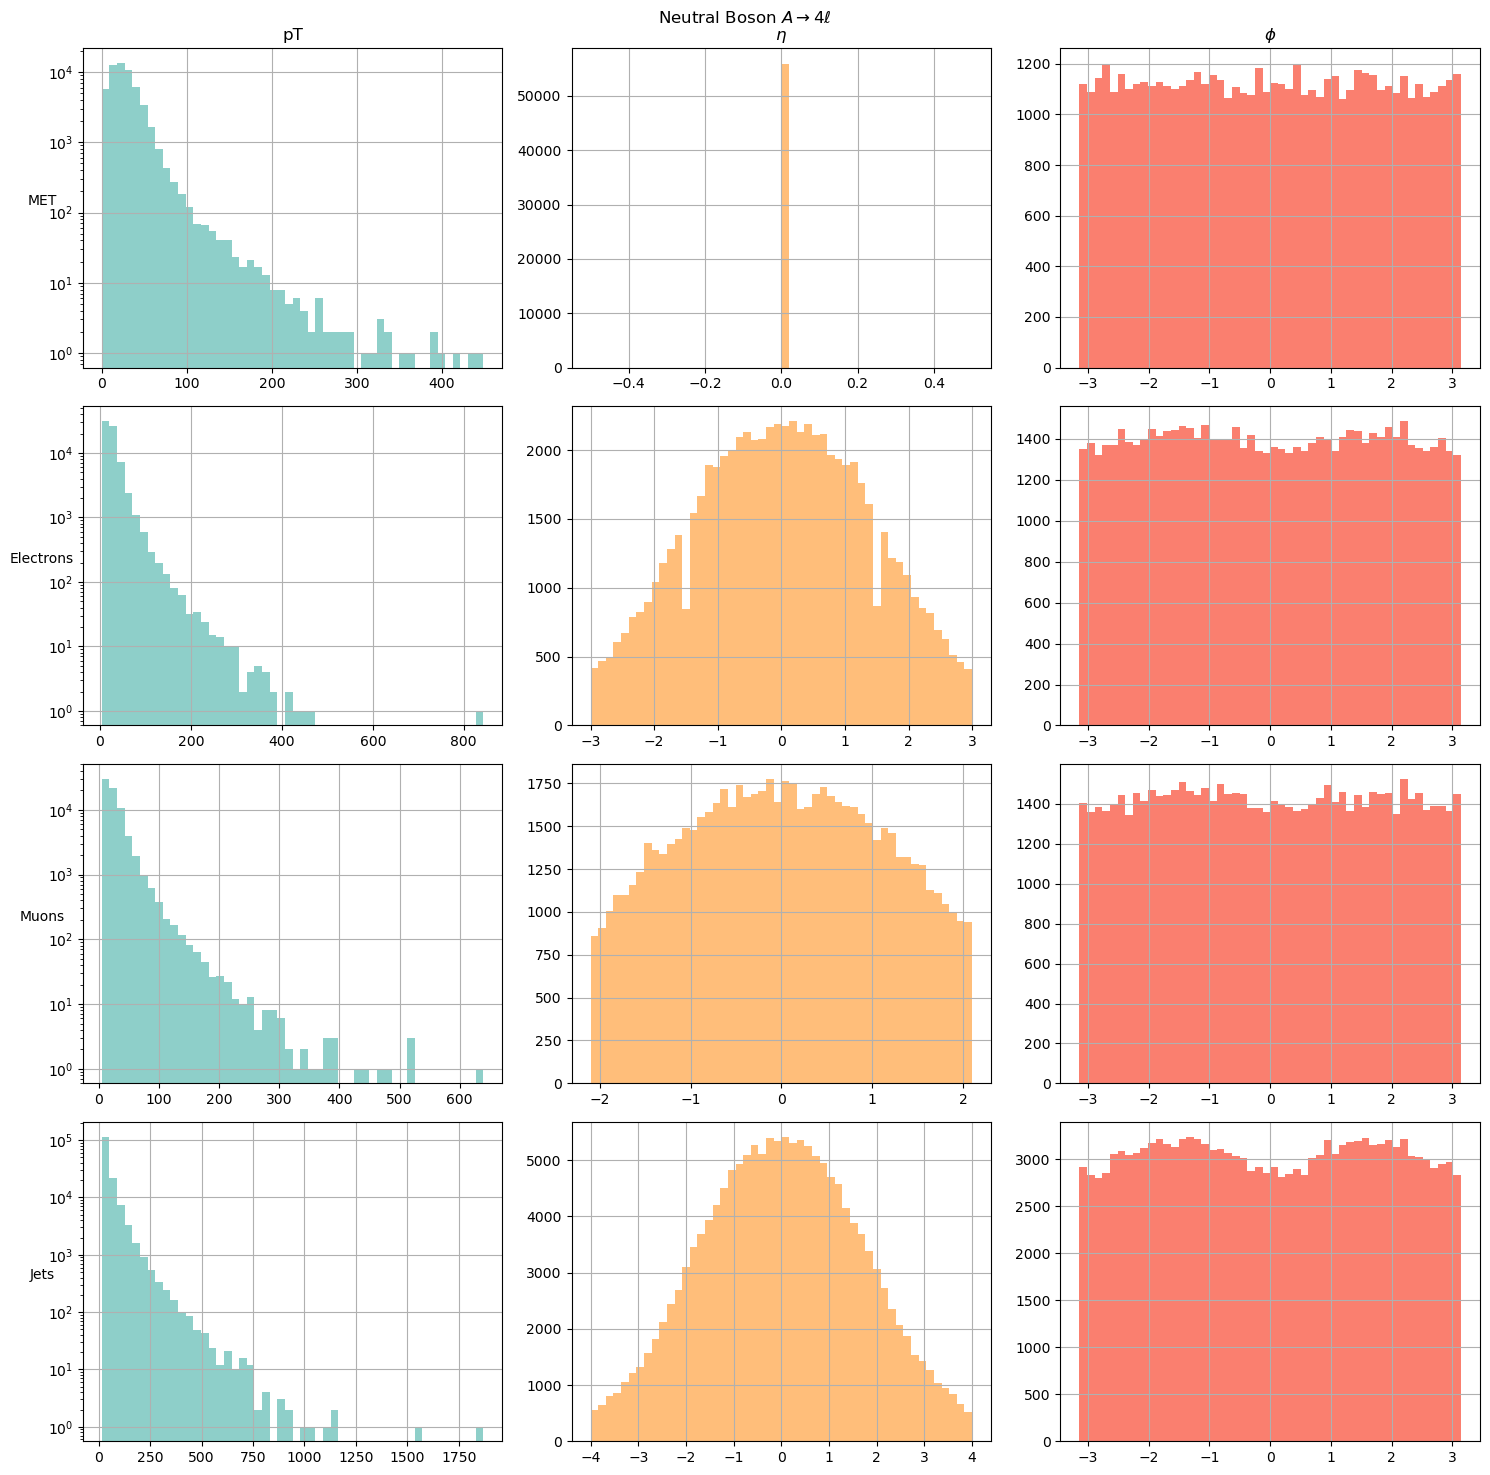

In [10]:
plot_hists(neutral_boson, r"Neutral Boson $A \rightarrow 4 \ell$")

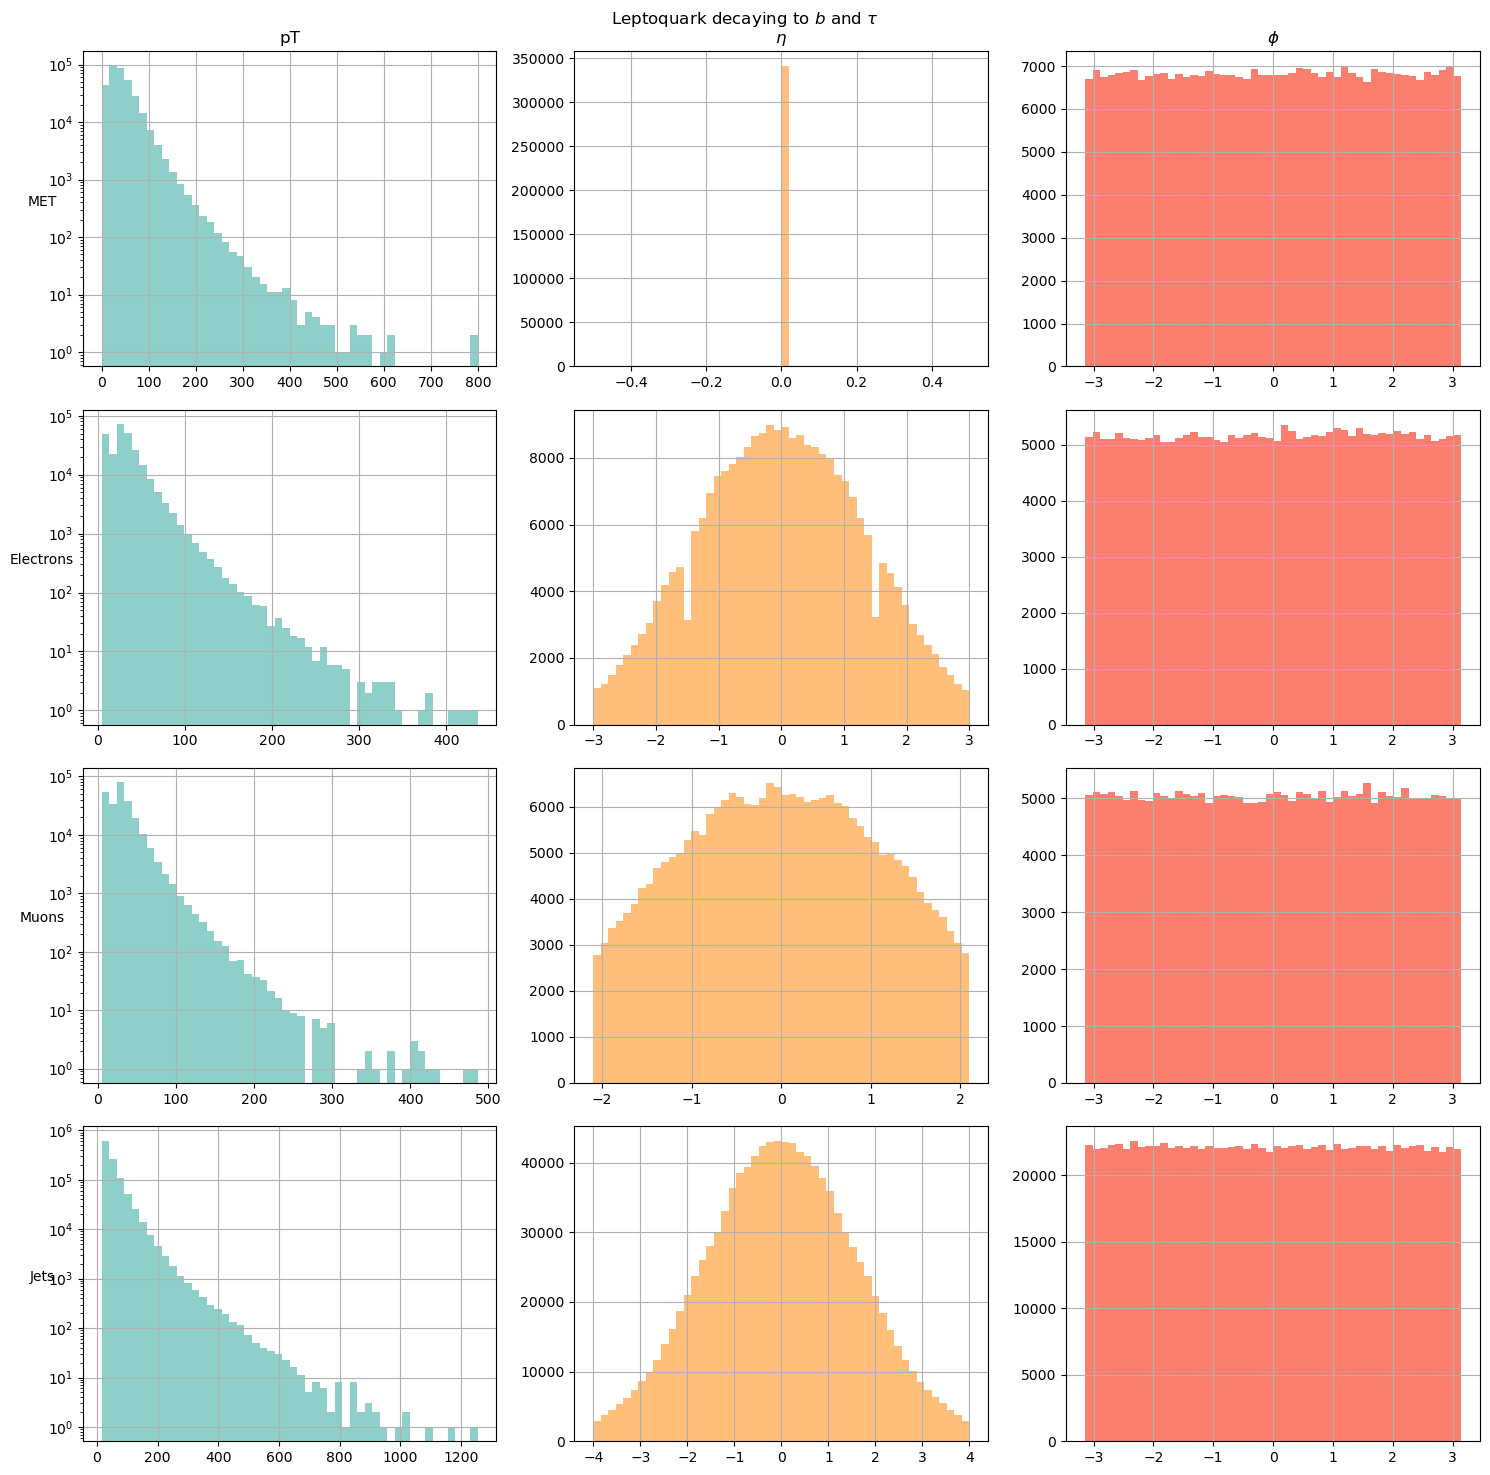

In [11]:
plot_hists(leptoquark, r"Leptoquark decaying to $b$ and $\tau$")

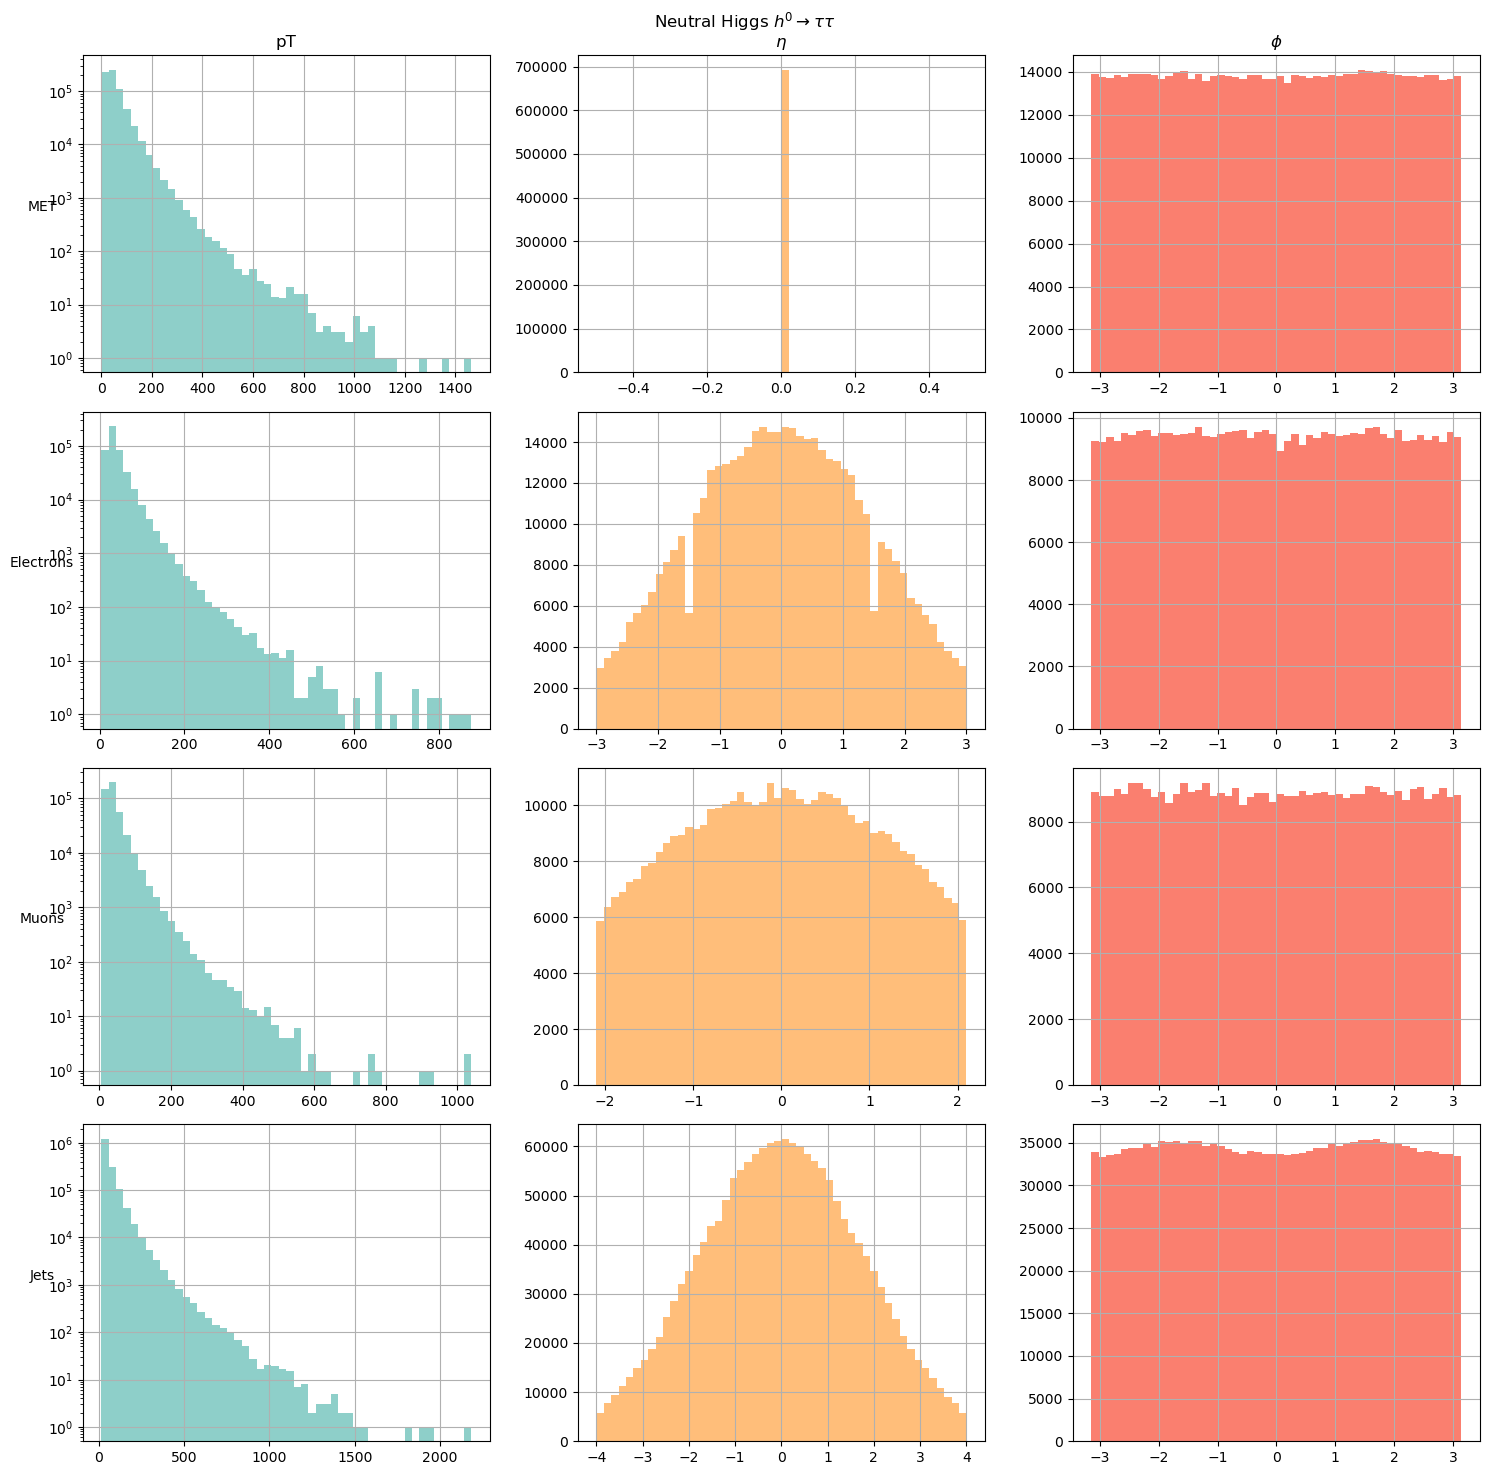

In [12]:
plot_hists(neutral_higgs, r"Neutral Higgs $h^0 \rightarrow \tau \tau$")

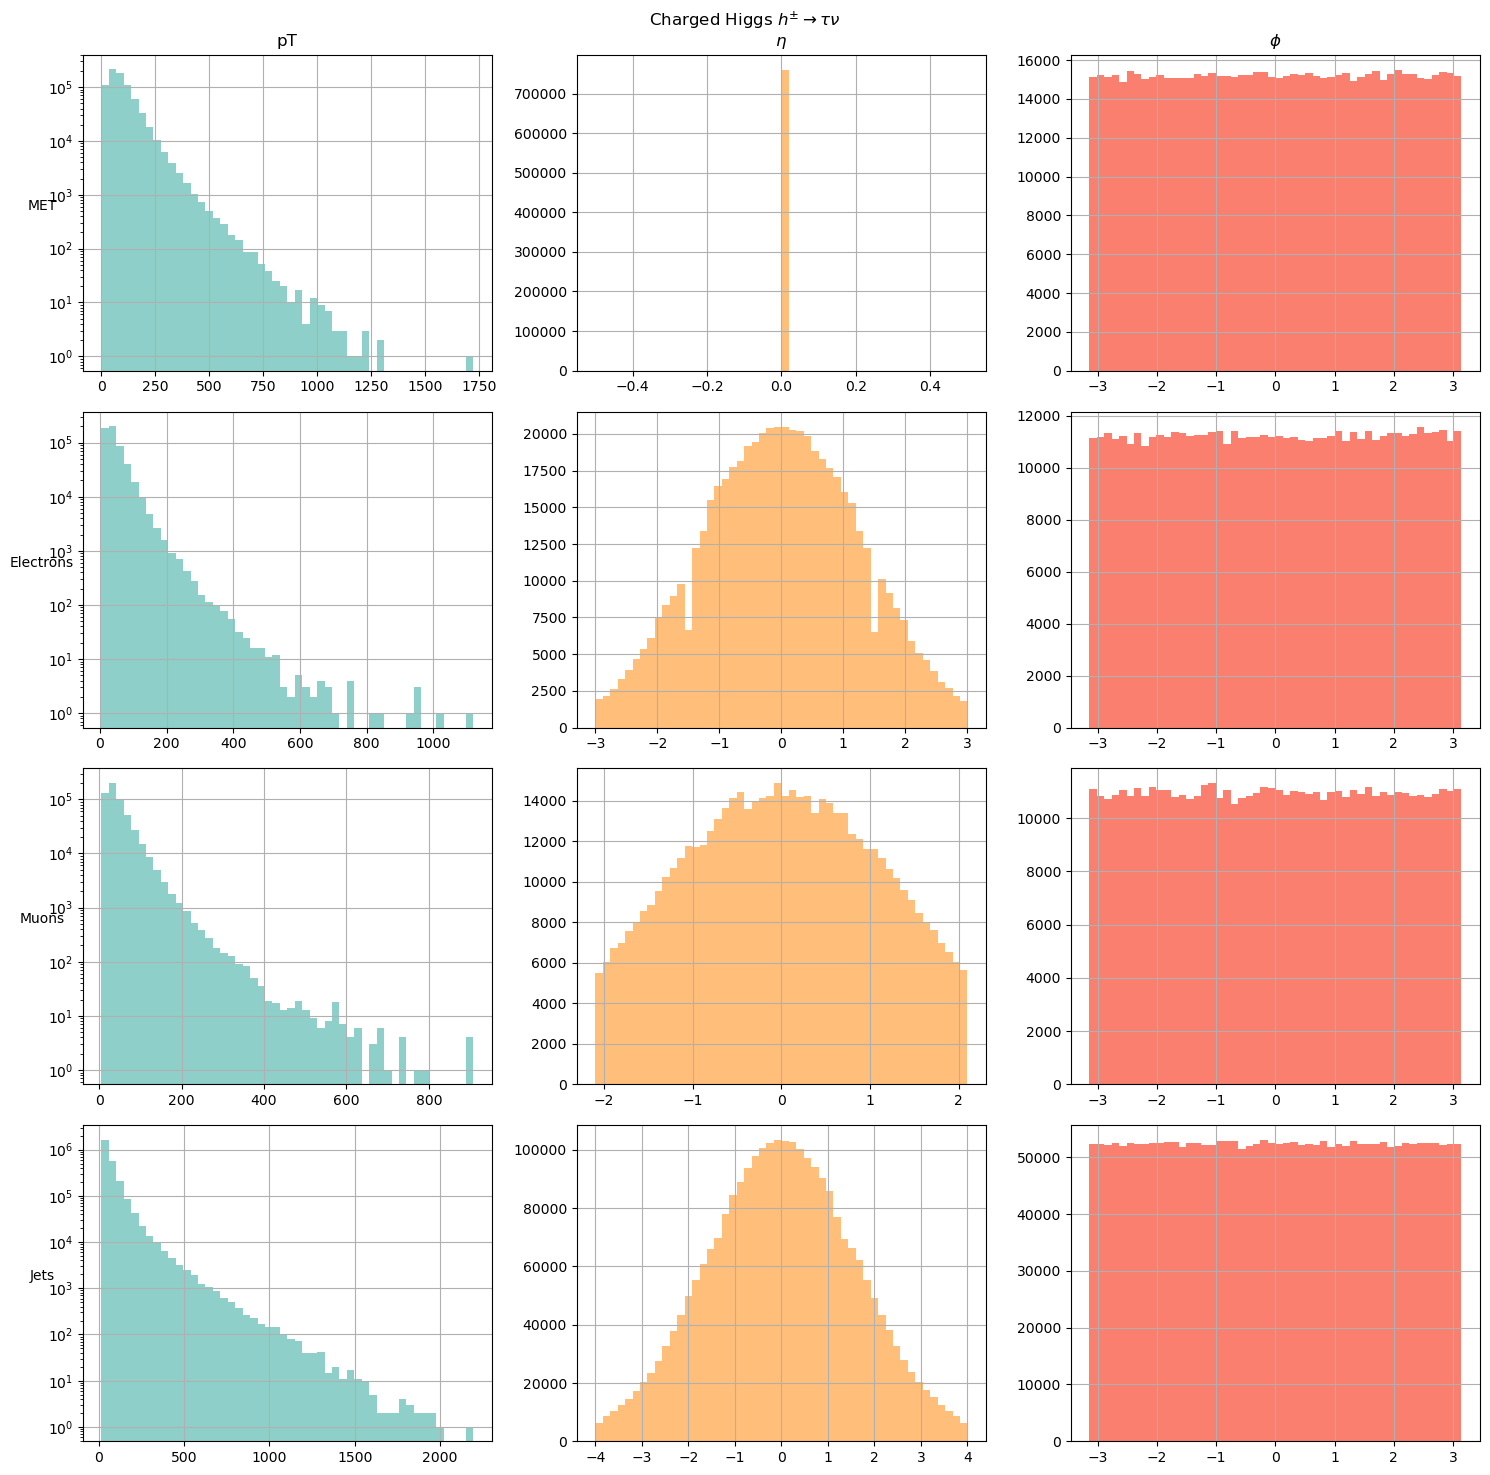

In [13]:
plot_hists(charged_higgs, r"Charged Higgs $h^{ \pm} \rightarrow \tau \nu$")